In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle("dns_parquet_files.pkl")
df


request_ts    response_ts client_token_dec  \
0       1678371763826  1678371763826            38945   
1       1678371763829  1678371763830             8057   
2       1678371763835  1678371763836            13301   
3       1678371763858  1678371763859             8057   
4       1678371763880  1678371763881            23202   
...               ...            ...              ...   
145804  1678373687557  1678373687557            11261   
145805  1678373687568  1678373687568             8764   
145806  1678373690051  1678373690052            25710   
145807  1678373690093  1678373690093            37463   
145808  1678373690116  1678373690116            25710   

                                            qname  qtype  \
0                        BRWFC017C4A49FC.RAC2V1A.      1   
1                    endpoint.ingress.rapid7.com.      1   
2                   inputs10.fwh.splunkcloud.com.      1   
3                    endpoint.ingress.rapid7.com.      1   
4                    inputs3.fwh.splunkcloud.com.      1   
...                                           ...    ...   
145804               endpoint.ingress.rapid7.com.      1   
145805  us.bootstrap.endpoint.ingress.rapid7.com.      1   
145806        us.api.endpoint.ingress.rapid7.com.      1   
145807        us.api.endpoint.ingress.rapid7.com.      1   
145808        us.api.endpoint.ingress.rapid7.com.      1   

                                                   answer  nx_domain  \
0                                                      []          1   
1       [{'name': 'endpoint.ingress.rapid7.com.', 'ttl...          0   
2       [{'name': 'inputs10.fwh.splunkcloud.com.', 'tt...          0   
3       [{'name': 'endpoint.ingress.rapid7.com.', 'ttl...          0   
4       [{'name': 'inputs3.fwh.splunkcloud.com.', 'ttl...          0   
...                                                   ...        ...   
145804  [{'name': 'endpoint.ingress.rapid7.com.', 'ttl...          0   
145805  [{'name': 'us.bootstrap.endpoint.ingress.rapid...          0   
145806  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   
145807  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   
145808  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   

        l1_cache_hit  response_size category_id list_id  is_malicious  \
0               True            139                                 0   
1               True            293                                 0   
2               True            149                                 0   
3               True            293                                 0   
4               True            148                                 0   
...              ...            ...         ...     ...           ...   
145804          True            293                                 0   
145805          True            306                                 0   
145806          True            314                                 0   
145807          True            314                                 0   
145808          True            314                                 0   

                                                     File  
0       /home/hodefi/projects/DNS_DL/ariel_university_...  
1       /home/hodefi/projects/DNS_DL/ariel_university_...  
2       /home/hodefi/projects/DNS_DL/ariel_university_...  
3       /home/hodefi/projects/DNS_DL/ariel_university_...  
4       /home/hodefi/projects/DNS_DL/ariel_university_...  
...                                                   ...  
145804  /home/hodefi/projects/DNS_DL/ariel_university_...  
145805  /home/hodefi/projects/DNS_DL/ariel_university_...  
145806  /home/hodefi/projects/DNS_DL/ariel_university_...  
145807  /home/hodefi/projects/DNS_DL/ariel_university_...  
145808  /home/hodefi/projects/DNS_DL/ariel_university_...  

[2795968 rows x 13 columns]

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
profile.to_file("your_report.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### histogram for qname and colored by values of is is_malicious

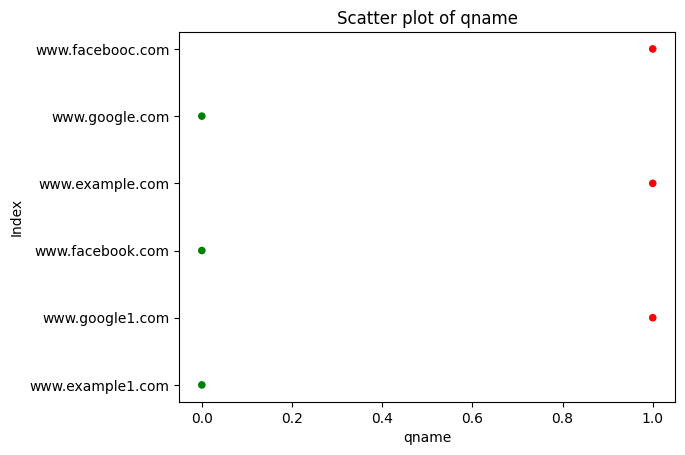

In [30]:
import pandas as pd
import matplotlib as plt

# create a sample DataFrame
ddf = pd.DataFrame([['www.example1.com',False],['www.google1.com',True],[ 'www.facebook.com',False],[ 'www.example.com',True],[ 'www.google.com',False],[ 'www.facebooc.com',True]],
                   columns=['qname','is_malicious'])
ddf['is_mal_num'] = ddf['is_malicious'].apply(lambda x: 1 if x else 0)


# define the colors for different values of is_malicious
color_map = {True: 'red', False: 'green'}
colors = ddf['is_malicious'].map(color_map)

y_map = {True: "1", False: "0"}
y_fun = ddf['is_malicious'].map(y_map)
    
# create the scatter plot
ax = ddf.plot.scatter(x='is_mal_num', y='qname', c=colors)

# set the title and labels
ax.set_title('Scatter plot of qname')
ax.set_xlabel('qname')
ax.set_ylabel('Index')

# show the plot
plt.pyplot.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# create a sample string
text = "This is a sample string."
text1 = "This i s a fddg fnbfn str dfhbdfh ing."

# create an instance of CountVectorizer
vectorizer = CountVectorizer()

# fit and transform the text using the vectorizer
vector = vectorizer.fit_transform([text]).toarray()
vector1 = vectorizer.fit_transform([text1]).toarray()

# print the vector
print(vector)
print(vector1)

[[1 1 1 1]]
[[1 1 1 1 1 1]]


In [35]:
import pandas as pd
import matplotlib as plt

df['is_mal_num'] = df['is_malicious'].apply(lambda x: 1 if x == 1 else 0)


# define the colors for different values of is_malicious
color_map = {1: 'red', 0: 'green'}
colors = df['is_malicious'].map(color_map)

plt.pyplot.rcParams["font.family"] = "Arial"
    
# create the scatter plot
ax = df.plot.scatter(x='is_mal_num', y='qname', c=colors)

# set the title and labels
ax.set_title('Scatter plot of qname')
ax.set_xlabel('Index')
ax.set_ylabel('qname')

# show the plot
plt.pyplot.show()

/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df = df.drop('File', axis=1)
new_df['qname'] = le.fit_transform(df['qname'])
new_df['qtype'] = le.fit_transform(df['qtype'])
new_df['answer'] = le.fit_transform(df['answer'].astype(str))
new_df['category_id'] = le.fit_transform(df['category_id'])
new_df['answer'] = le.fit_transform(df['answer'].astype(str))
new_df['list_id'] = le.fit_transform(df['answer'].astype(str))

# compute the correlation matrix
corr_matrix = new_df.corr()
# df = df.drop('is_mal_num', axis=1)

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='flare')

# display the plot
plt.show()


/tmp/ipykernel_53725/125395990.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# split the data into features and target variable
# X = df.drop('is_malicious', axis=1)
y = df['is_malicious']

# encode the 'category' column using LabelEncoder
le = LabelEncoder()
new_df = df.drop('File', axis=1)
new_df['qname'] = le.fit_transform(df['qname'])
new_df['answer'] = le.fit_transform(df['answer'].astype(str))
new_df['l1_cache_hit'] = le.fit_transform(df['l1_cache_hit'])
# new_df['category_id'] = le.fit_transform(df['category_id'])

new_df = new_df.drop('is_malicious', axis=1)
new_df = new_df.drop('category_id', axis=1)
X = new_df.drop('list_id', axis=1)

# fit a random forest regressor to the data
rf = RandomForestRegressor()
rf.fit(X, y)

# compute feature importance
importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
importance = importance.sort_values('importance', ascending=False).reset_index(drop=True)

# display the results
print(importance)

            feature  importance
0            answer    0.477923
1     response_size    0.304445
2             qname    0.184335
3  client_token_dec    0.024860
4             qtype    0.004173
5       response_ts    0.002014
6        request_ts    0.001771
7      l1_cache_hit    0.000407
8         nx_domain    0.000072


In [41]:
sumOfMal =0
sumOfBenign =0
odd=0
for f in df["is_malicious"]:
    if f == 1:
        sumOfMal+=1
    else:
        if f == 0:
            sumOfBenign +=1
        else:
            odd+=1
sum=sumOfMal+sumOfBenign

print("odd -",odd)
print("overall files : ",sum)
print("malware - ",sumOfMal)
print("malware precent ",sumOfMal/sum)
print("benign - ",sumOfBenign)
print("benign precent ",sumOfBenign/sum)



odd - 0
overall files :  2795968
malware -  2331
malware precent  0.0008337005287614164
benign -  2793637
benign precent  0.9991662994712386


In [16]:
index =-1
arr = []
for f in df["is_malicious"]:
    index+=1
    if f == 1 and len(arr) < 20:
        arr.append(index)
df.iloc[arr]

    

request_ts    response_ts client_token_dec  \
4600   1678371624682  1678371624682             4973   
11649  1678373131565  1678373131565            28335   
11650  1678373131596  1678373131596            28335   
19871  1678371914494  1678371914494             7814   
21276  1678371917239  1678371917349            30114   
21277  1678371917209  1678371917349            30114   
25946  1678372380656  1678372380665               86   
34024  1678371300502  1678371300504            30114   
34475  1678371319359  1678371319359            11434   
38957  1678371145299  1678371145934            39277   
44351  1678370869944  1678370869944             4973   
44482  1678371338456  1678371338457             4973   
44857  1678370855085  1678370855088            29856   
57395  1678372720752  1678372720755            39630   
58181  1678372731213  1678372731226             9825   
58237  1678372733097  1678372733235            42679   
58238  1678372733160  1678372733235            42679   
58313  1678372724273  1678372724274            22266   
58364  1678372724666  1678372724666            10399   
58401  1678372724890  1678372724899            15015   

                                  qname  qtype  \
4600                  badawi.myvnc.com.      1   
11649       s3.eu-west-1.amazonaws.com.      1   
11650       s3.eu-west-1.amazonaws.com.      1   
19871       s3.eu-west-1.amazonaws.com.      1   
21276  s3.ap-southeast-2.amazonaws.com.      1   
21277  s3.ap-southeast-2.amazonaws.com.      1   
25946       s3.eu-west-1.amazonaws.com.      1   
34024  s3.ap-southeast-2.amazonaws.com.      1   
34475                  hhtuepictom.com.      1   
38957                  shubasairy.life.      1   
44351                 badawi.myvnc.com.      1   
44482                 badawi.myvnc.com.      1   
44857       s3.eu-west-1.amazonaws.com.      1   
57395       s3.eu-west-1.amazonaws.com.      1   
58181  s3.ap-southeast-2.amazonaws.com.      1   
58237  s3.ap-southeast-2.amazonaws.com.      1   
58238  s3.ap-southeast-2.amazonaws.com.      1   
58313       s3.eu-west-1.amazonaws.com.      1   
58364       s3.eu-west-1.amazonaws.com.      1   
58401       s3.eu-west-1.amazonaws.com.      1   

                                                  answer  nx_domain  \
4600                                                  []          0   
11649  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
11650  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
19871  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
21276  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
21277  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
25946  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
34024  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
34475                                                 []          1   
38957  [{'name': 'shubasairy.life.', 'ttl': 60, 'clas...          0   
44351                                                 []          0   
44482                                                 []          0   
44857  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
57395  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
58181  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
58237  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
58238  [{'name': 's3.ap-southeast-2.amazonaws.com.', ...          0   
58313  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
58364  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   
58401  [{'name': 's3.eu-west-1.amazonaws.com.', 'ttl'...          0   

       l1_cache_hit  response_size category_id                      list_id  \
4600           True            114     MALWARE                      MALWARE   
11649          True            195     MALWARE  PARTIALLY_MALICIOUS_MALWARE   
11650          True            195     MALWARE  PARTI

In [5]:
l = list()
for f in df["qtype"]:
    if f not in l:
        l.append(f)
print(l)

[1, 28, 65, 2, 6, 12, 33, 64, 5]


In [12]:
c = 10
index =0
l = list()
for f in df["answer"]:
    index+=1
    if index<c:
        l.append(f)
print(l)

[array([], dtype=object), array([{'name': 'endpoint.ingress.rapid7.com.', 'ttl': 182, 'class_': 'IN', 'type_': 5, 'value': array([101, 110, 100, 112, 111, 105, 110, 116,  45, 105, 110, 103, 114,
              101, 115, 115,  46, 114,  97, 122, 111, 114,  45, 115, 101, 114,
              118, 105,  99, 101,  46, 114,  97, 122, 111, 114,  45, 112, 114,
              111, 100,  45,  49,  46, 117, 115,  45, 101,  97, 115, 116,  45,
               49,  46, 114,  55, 111, 112, 115,  46,  99, 111, 109,  46],
             dtype=int8), 'value_str': 'endpoint-ingress.razor-service.razor-prod-1.us-east-1.r7ops.com.'}                                                              ,
       {'name': 'endpoint-ingress.razor-service.razor-prod-1.us-east-1.r7ops.com.', 'ttl': 246, 'class_': 'IN', 'type_': 5, 'value': array([101, 110, 100, 112, 111, 105, 110, 116, 105, 110, 103, 114, 101,
              115, 115, 110, 108,  98,  45, 114,  97, 122, 111, 114,  45, 112,
              114, 111, 100,  45,  49, 

In [3]:
kindOfMal = list()
for f in df["list_id"]:
    if f not in kindOfMal:
        kindOfMal.append(f)
print(kindOfMal)


['', 'MALWARE', 'PARTIALLY_MALICIOUS_MALWARE', 'CNC', 'PARTIALLY_MALICIOUS_PHISHING', 'PHISHING']


In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle("dns_parquet_files_10.pkl")
df

request_ts    response_ts client_token_dec  \
0       1678371763826  1678371763826            38945   
1       1678371763829  1678371763830             8057   
2       1678371763835  1678371763836            13301   
3       1678371763858  1678371763859             8057   
4       1678371763880  1678371763881            23202   
...               ...            ...              ...   
105403  1678371067329  1678371067329            30950   
105404  1678371067329  1678371067330            40399   
105405  1678371067439  1678371067439             1571   
105406  1678371067454  1678371067454            33293   
105407  1678371067471  1678371067471             1571   

                                      qname  qtype  \
0                  BRWFC017C4A49FC.RAC2V1A.      1   
1              endpoint.ingress.rapid7.com.      1   
2             inputs10.fwh.splunkcloud.com.      1   
3              endpoint.ingress.rapid7.com.      1   
4              inputs3.fwh.splunkcloud.com.      1   
...                                     ...    ...   
105403       v20.events.data.microsoft.com.      1   
105404  us.api.endpoint.ingress.rapid7.com.      1   
105405  us.api.endpoint.ingress.rapid7.com.      1   
105406         inputs2.fwh.splunkcloud.com.      1   
105407  us.api.endpoint.ingress.rapid7.com.      1   

                                                   answer  nx_domain  \
0                                                      []          1   
1       [{'name': 'endpoint.ingress.rapid7.com.', 'ttl...          0   
2       [{'name': 'inputs10.fwh.splunkcloud.com.', 'tt...          0   
3       [{'name': 'endpoint.ingress.rapid7.com.', 'ttl...          0   
4       [{'name': 'inputs3.fwh.splunkcloud.com.', 'ttl...          0   
...                                                   ...        ...   
105403  [{'name': 'v20.events.data.microsoft.com.', 't...          0   
105404  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   
105405  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   
105406  [{'name': 'inputs2.fwh.splunkcloud.com.', 'ttl...          0   
105407  [{'name': 'us.api.endpoint.ingress.rapid7.com....          0   

        l1_cache_hit  response_size category_id list_id  is_malicious  \
0               True            139                                 0   
1               True            293                                 0   
2               True            149                                 0   
3               True            293                                 0   
4               True            148                                 0   
...              ...            ...         ...     ...           ...   
105403          True            211                                 0   
105404          True            314                                 0   
105405          True            314                                 0   
105406          True            148                                 0   
105407          True            314                                 0   

                                                     File  
0       /home/hodefi/projects/DNS_DL/ariel_university_...  
1       /home/hodefi/projects/DNS_DL/ariel_university_...  
2       /home/hodefi/projects/DNS_DL/ariel_university_...  
3       /home/hodefi/projects/DNS_DL/ariel_university_...  
4       /home/hodefi/projects/DNS_DL/ariel_university_...  
...                                                   ...  
105403  /home/hodefi/projects/DNS_DL/ariel_university_...  
105404  /home/hodefi/projects/DNS_DL/ariel_university_...  
105405  /home/hodefi/projects/DNS_DL/ariel_university_...  
105406  /home/hodefi/projects/DNS_DL/ariel_university_...  
105407  /home/hodefi/projects/DNS_DL/ariel_university_...  

[1441814 rows x 13 columns]

In [7]:
def mal_num(df):
    sum_mal = 0
    sum_ben = 0 
    for line in df["is_malicious"]:
        if line == 0:
            sum_ben += 1
        else:
            sum_mal += 1
    print("sum mal = ", sum_mal)
    print("sum ben = ", sum_ben)
    return (sum_mal,sum_ben)


In [9]:
import cudf
import pandas as pd

df_concat = pd.read_pickle("dns_parquet_files_10.pkl")


for i in range(20,50,10):
    df_part = pd.read_pickle("dns_parquet_files_"+str(i)+".pkl")
    df_concat = pd.concat([df_concat, df_part], ignore_index=True)
    
gdf1_5 = cudf.from_pandas(df_concat)



KeyboardInterrupt: 

In [2]:
import cudf
gdf = cudf.DataFrame({'label': ['A', 'B', 'C', 'A', 'A', 'B', 'C', 'C', 'A']})
counts = gdf['label'].value_counts()
print(counts)


A    4
C    3
B    2
Name: label, dtype: int32


In [1]:
import pandas as pd
import cudf

df_part = pd.read_pickle("dns_parquet_files_10.pkl")
# Convert the Pandas DataFrame to a cuDF DataFrame
gdf = cudf.from_pandas(df_part)

result = gdf.groupby('list_id')['response_size'].mean()
# result = gdf.groupby('list_id')['qtype'].value_counts()
# counts_list = gdf['list_id'].value_counts()
# result = gdf.groupby('list_id').apply(lambda x: (x['response_ts']  - x['request_ts']).mean())
# nx_domain = gdf.groupby('list_id')['nx_domain'].value_counts()
# l1_cache_hit = gdf.groupby('list_id')['l1_cache_hit'].value_counts()


In [3]:

print(result)
result += result
print(result)


list_id
PHISHING                         90.000000
CNC                             118.666667
PARTIALLY_MALICIOUS_MALWARE     149.453581
PARTIALLY_MALICIOUS_PHISHING    196.303665
                                194.700044
MALWARE                         139.056180
Name: response_size, dtype: float64
list_id
PHISHING                        180.000000
CNC                             237.333333
PARTIALLY_MALICIOUS_MALWARE     298.907162
PARTIALLY_MALICIOUS_PHISHING    392.607330
                                389.400087
MALWARE                         278.112360
Name: response_size, dtype: float64


In [13]:
# counts_list = gdf['list_id'].value_counts()
# result = gdf.groupby('list_id')['response_size'].mean().reset_index()
result = gdf.groupby('list_id')['response_size'].mean()

print(result)


list_id
PHISHING                         90.000000
CNC                             118.666667
PARTIALLY_MALICIOUS_MALWARE     149.453581
PARTIALLY_MALICIOUS_PHISHING    196.303665
                                194.700044
MALWARE                         139.056180
Name: response_size, dtype: float64


In [36]:
def write_to_file(file_name,data="\n\n",info="\n\n"):
    with open(file_name, "a") as f:
        f.write((str(info)+"\n"))
        f.write(str(data))
        
# write_to_file(result, "list_id_response_size",10)


In [38]:
def get_staticstis(gdf,part_number):
    file_name = "part"+ part_number +"statistics"  
    list_id_value_counts = gdf['list_id'].value_counts()
    write_to_file(file_name,list_id_value_counts,"list_id_value_counts")

    list_id_response_size_mean = gdf.groupby('list_id')['response_size'].mean()
    write_to_file( file_name,list_id_response_size_mean,"list_id_response_size_mean")
    
    list_id_qtype_value_counts = gdf.groupby(['list_id', 'qtype']).size().reset_index(name='count').sort_values('list_id')
    write_to_file(file_name,list_id_qtype_value_counts, "list_id_qtype_value_counts")
    
    list_id_qtype_response_ts_mean = gdf.groupby('list_id').apply(lambda x: (x['response_ts']  - x['request_ts']).mean())
    write_to_file(file_name,list_id_qtype_response_ts_mean, "list_id_qtype_response_ts_mean")
    
    list_id_nx_domain_value_counts = gdf.groupby(['list_id', 'nx_domain']).size().reset_index(name='count').sort_values('list_id')
    write_to_file( file_name,list_id_nx_domain_value_counts,"list_id_nx_domain_value_counts")
    
    list_id_l1_cache_hit_value_counts = gdf.groupby(['list_id', 'l1_cache_hit']).size().reset_index(name='count').sort_values('list_id')
    write_to_file(file_name,list_id_l1_cache_hit_value_counts, "list_id_l1_cache_hit_value_counts")
    print(file_name,"done!")


In [5]:
def get_staticstis_list_id_value_counts(gdf):
    return gdf['list_id'].value_counts()

def get_staticstis_response_size_mean(gdf):
    return gdf.groupby('list_id')['response_size'].mean()

def get_staticstis_qtype_value_counts(gdf):
    return gdf.groupby(['list_id', 'qtype']).size().reset_index(name='count').sort_values('list_id')

def get_staticstis_response_ts_mean(gdf):
    return gdf.groupby('list_id').apply(lambda x: (x['response_ts']  - x['request_ts']).mean())

def get_staticstis_nx_domain_value_counts(gdf):
    return gdf.groupby(['list_id', 'nx_domain']).size().reset_index(name='count').sort_values('list_id')

def get_staticstis_l1_cache_hit_value_counts(gdf):
    return gdf.groupby(['list_id', 'l1_cache_hit']).size().reset_index(name='count').sort_values('list_id')
    

In [9]:
list_id_value_counts=get_staticstis_list_id_value_counts(gdf)
qtype_value_counts=get_staticstis_qtype_value_counts(gdf)
nx_domain_value_counts = get_staticstis_nx_domain_value_counts(gdf)
l1_cache_hit_value_counts =get_staticstis_l1_cache_hit_value_counts(gdf)

In [10]:
import cudf
import pandas as pd

for i in range(20,131,10):
    df_part = pd.read_pickle("dns_parquet_files_"+str(i)+".pkl")
    gdf = cudf.from_pandas(df_part)
    list_id_value_counts += get_staticstis_list_id_value_counts(gdf)
    qtype_value_counts += get_staticstis_qtype_value_counts(gdf)
    nx_domain_value_counts += get_staticstis_nx_domain_value_counts(gdf)
    l1_cache_hit_value_counts += get_staticstis_l1_cache_hit_value_counts(gdf)
    print(str(i),"done!")

#     get_staticstis(gdf,str(i))


20 done!
30 done!
40 done!
50 done!
60 done!
70 done!
80 done!
90 done!
100 done!
110 done!
120 done!
130 done!


In [11]:
print(list_id_value_counts) 
print(qtype_value_counts)
print(nx_domain_value_counts) 
print(l1_cache_hit_value_counts) 

                                16756744
CNC                                   66
MALWARE                              961
PARTIALLY_MALICIOUS_CNC             <NA>
PARTIALLY_MALICIOUS_MALWARE        12369
PARTIALLY_MALICIOUS_PHISHING        2567
PHISHING                            <NA>
Name: list_id, dtype: int32
                                              list_id qtype    count
0   PHISHINGPARTIALLY_MALICIOUS_MALWAREPARTIALLY_M...   373    97798
1              MALWAREPARTIALLY_MALICIOUS_PHISHINGCNC   273  3755820
2   CNCPHISHINGCNCPARTIALLY_MALICIOUS_PHISHINGPART...   288  1264232
3   MALWAREMALWAREPARTIALLY_MALICIOUS_MALWAREPARTI...   204   118575
4   PARTIALLY_MALICIOUS_PHISHINGPARTIALLY_MALICIOU...   196     4112
5   MALWAREPARTIALLY_MALICIOUS_PHISHINGPARTIALLY_M...   232    61197
6   PARTIALLY_MALICIOUS_MALWAREPARTIALLY_MALICIOUS...   261  1353830
7   PARTIALLY_MALICIOUS_PHISHINGPARTIALLY_MALICIOU...   368  2227711
8   PHISHINGPARTIALLY_MALICIOUS_MALWAREMALWAREPART...   189     

In [42]:
import cudf
import pandas as pd

# df_part = pd.read_pickle("dns_parquet_files_"+str(130)+".pkl")
# gdf = cudf.from_pandas(df_part)
get_staticstis(gdf,str(130))


part130statistics done!


In [2]:
import math
import cudf
import numpy as np
import pandas as pd

import math

# create DataFrame
df_part = pd.read_pickle("/home/hodefi/projects/DNS_DL/dns_parquet_files_10.pkl")
# Convert the Pandas DataFrame to a cuDF DataFrame
gdf = cudf.from_pandas(df_part)

print(gdf)

           request_ts    response_ts client_token_dec  \
0       1678371763826  1678371763826            38945   
1       1678371763829  1678371763830             8057   
2       1678371763835  1678371763836            13301   
3       1678371763858  1678371763859             8057   
4       1678371763880  1678371763881            23202   
...               ...            ...              ...   
105403  1678371067329  1678371067329            30950   
105404  1678371067329  1678371067330            40399   
105405  1678371067439  1678371067439             1571   
105406  1678371067454  1678371067454            33293   
105407  1678371067471  1678371067471             1571   

                                      qname  qtype  \
0                  BRWFC017C4A49FC.RAC2V1A.      1   
1              endpoint.ingress.rapid7.com.      1   
2             inputs10.fwh.splunkcloud.com.      1   
3              endpoint.ingress.rapid7.com.      1   
4              inputs3.fwh.splunkcloud.com.  

In [5]:
import pandas as pd
import entropy

# define the function to calculate entropy
def get_entropy(s):
    return entropy.shannon_entropy(s.encode('utf-8'))

# apply the function to each element in the Series and store the results in a new column
s_entropy = gdf.apply(get_entropy)
# s_entropy  = gdf['qname'].apply(lambda x: -sum([x.count(c)/len(x) * math.log2(x.count(c)/len(x)) for c in set(x)]))
print(s_entropy.head())

ValueError: user defined function compilation failed.

In [6]:
gdf.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File  
0  /home/hodefi/projects/DNS_DL/ariel_university_...  
1  /home/hodefi/projects/DNS_DL/ariel_university_...  
2  /home/hodefi/projects/DNS_DL/ariel_university_...  
3  /home/hodefi/projects/DNS_DL/ariel_university_...  
4  /home/hodefi/projects/DNS_DL/ariel_university_...

In [11]:
import cudf
import math

# calculate entropy for each string in the 'qname' column
entropy_list = []
for i, row in gdf.to_pandas().iterrows():
    qname = row['qname']
    # count the frequency of each character in the string
    char_freq = {char: qname.count(char) for char in set(qname)}
    
    # calculate entropy using the formula
    entropy = sum(-freq / len(qname) * math.log(freq / len(qname), 2) for freq in char_freq.values())
    
    # append the entropy to the list
    entropy_list.append(entropy)

# add the list as a new column to the DataFrame
gdf['entropy'] = entropy_list
gdf.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842  
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434  
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364  
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434  
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252

In [18]:
pdf = gdf.to_pandas()

pdf.to_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy.pkl')

In [29]:
import pandas as pd

# Load the dataframe from a pickle file
df = pd.read_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy.pkl')


KeyboardInterrupt: 

In [33]:
pdf.head()
#  Create an empty dictionary to hold the results
results = {}

# Iterate over each unique value in the qname column
for name in pdf['qname'].unique():
    # Get a subset of the DataFrame for the current name
    subset = pdf[pdf['qname'] == name]

    # Count how many times 1 or 28 appear in the qtype column for the current name
    count = subset['qtype'].isin([1, 28]).sum()
    ratio = count/subset['qtype'].count()
    # Add the count to the results dictionary
    results[name] = ratio

pdf['type_ratio'] = pdf['qname'].map(results)

pdf.head()


request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0  
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0  
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0  
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0  
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0

In [34]:
pdf.to_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio.pkl')

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0  
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0  
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0  
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0  
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0

In [41]:
#  Create an empty dictionary to hold the results
results_vol = {}
results_avg_lenght = {}

# Iterate over each unique value in the qname column
for name in pdf['qname'].unique():
    # Get a subset of the DataFrame for the current name
    subset = pdf[pdf['qname'] == name]

    # Add the count to the results dictionary
    results_vol[name] = subset['qname'].count()
    results_avg_lenght[name] = len(name)
    
pdf['qname_vol'] = pdf['qname'].map(results_vol)
pdf['qname_len'] = pdf['qname'].map(results_avg_lenght)

pdf.to_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio_vol.pkl')


In [42]:
pdf.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  \
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0   
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0   
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0   

   qname_vol  qname_len  
0         20         24  
1      22463         28  
2      13629         29  
3      22463         28  
4      14065         28

In [49]:
import nltk

nltk.download('words')
from nltk.corpus import words
import pandas as pd
import re


english_dict = set(nltk.corpus.words.words())


#  Create an empty dictionary to hold the results
results_longest_word = {}
results_avg_longest_word_len = {}

# Iterate over each unique value in the qname column
for name in pdf['qname'].unique():
    # Get a subset of the DataFrame for the current name
    subset = pdf[pdf['qname'] == name]

    subdomains = re.findall(r'\b[A-Za-z]+\b', name)
    subdomains.sort(reverse=True)

#     print(name)
#     print(subdomains)
    english_word = ''
    
    for subdomain in subdomains:
        # Generate all possible substrings in decreasing order of length
        substrings = [subdomain[i:j] for i in range(len(subdomain)) for j in range(i + 1, len(subdomain) + 1)]
        substrings.sort(key=len, reverse=True)
#         print("substrings", substrings)

        # Check if each substring is a valid English word
        for substring in substrings:
            if len(english_word) > len(substring):
                break
            if substring.lower() in english_dict:
                # If a substring is a valid English word, return its length
                english_word = substring
#                 print("substring", substring)
                break

    if len(english_word) > 0:
        results_longest_word[name] = english_word
        results_avg_longest_word_len[name] = len(english_word) / len(name)
    else:
        results_longest_word[name] = ""
        results_avg_longest_word_len[name] = 0
    
pdf['longest_word'] = pdf['qname'].map(results_longest_word)
pdf['avg_longest_word_len'] = pdf['qname'].map(results_avg_longest_word_len)

pdf.to_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio_vol_longest_word_avg_longest_word_len.pkl')
pdf.head()

[nltk_data] Downloading package words to /home/hodefi/nltk_data...
[nltk_data]   Package words is already up-to-date!


request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  \
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0   
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0   
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0   

   qname_vol  qname_len longest_word  avg_longest_word_len  
0         20         24                           0.000000  
1      22463         28      ingress              0.250000  
2      13629         29        plunk              0.172414  
3      22463         28      ingress              0.250000  
4      14065         28        plunk              0.178571

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  \
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0   
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0   
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0   

   qname_vol  qname_len longest_word  avg_longest_word_len  
0         20         24          NaN                   NaN  
1      22463         28          NaN                   NaN  
2      13629         29          NaN                   NaN  
3      22463         28          NaN                   NaN  
4      14065         28          NaN                   NaN

In [50]:
import pandas as pd
import re



#  Create an empty dictionary to hold the results
results_unique_query_ratio = {}


# Iterate over each unique value in the qname column
for name in pdf['qname'].unique():
    # Get a subset of the DataFrame for the current name
    subset = pdf[pdf['qname'] == name]
    count = subset['qname'].count()
    unique = subset["qname"].nunique()
    results_unique_query_ratio[name] = unique/count

    
pdf['unique_query_ratio'] = pdf['qname'].map(results_unique_query_ratio)

pdf.to_pickle('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio_vol_longest_word_avg_longest_word_len_uniq.pkl')
pdf.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id list_id  is_malicious  \
0            139                                 0   
1            293                                 0   
2            149                                 0   
3            293                                 0   
4            148                                 0   

                                                File   entropy  type_ratio  \
0  /home/hodefi/projects/DNS_DL/ariel_university_...  3.636842         1.0   
1  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
2  /home/hodefi/projects/DNS_DL/ariel_university_...  4.004364         1.0   
3  /home/hodefi/projects/DNS_DL/ariel_university_...  3.753434         1.0   
4  /home/hodefi/projects/DNS_DL/ariel_university_...  3.923252         1.0   

   qname_vol  qname_len longest_word  avg_longest_word_len  unique_query_ratio  
0         20         24                           0.000000            0.050000  
1      22463         28      ingress              0.250000            0.000045  
2      13629         29        plunk              0.172414            0.000073  
3      22463         28      ingress              0.250000            0.000045  
4      14065         28        plunk              0.178571            0.000071

In [57]:
import cudf
# from cuml import IsolationForest
from cuml import RandomForestClassifier as cuRF
from cuml.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the data
cdf = cudf.DataFrame.from_pandas(pdf)

# Split the data into features (X) and target (y)
X = cdf[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len']]
y = cdf['is_malicious']

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# cuml Random Forest params      
cu_rf_params = {                
    "n_estimators": 25,          
    "max_depth": 13,             
     "n_bins": 15,               
     "n_streams": 8 }
clf = cuRF(**cu_rf_params)

# Train the model
# clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
clf.fit(X_train,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred)

# Print the results
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')

filename = '/home/hodefi/projects/DNS_DL/model_isolationForest.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    

# assume y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()

MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /project/include/rmm/mr/device/cuda_memory_resource.hpp:70: cudaErrorMemoryAllocation out of memory

[[     0      0      0]
 [ 34822      0 233732]
 [     3      0    199]]
[[     0      0      0]
 [ 34822      0 233732]
 [     3      0    199]]


/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    268554
           1       0.00      0.99      0.00       202

    accuracy                           0.00    268756
   macro avg       0.00      0.33      0.00    268756
weighted avg       0.00      0.00      0.00    268756



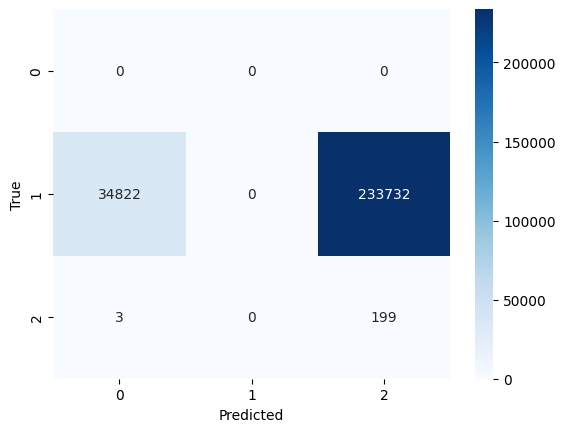

In [16]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# print(pdf.head())
# load your data into a pandas dataframe
# df = pdf

# select the columns you want to use as features
# X = df[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len']]
X = df[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len','euclidean_distance','manhattan_distance']]
# X = df[['euclidean_distance','manhattan_distance']]
# X = df[['euclidean_distance']]
# X = df[['manhattan_distance']]

# select the column you want to predict
y = df['is_malicious']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the isolation forest model
clf = IsolationForest(random_state=42)
clf.fit(X_train)

# predict on the testing set
y_pred = clf.predict(X_test)

# evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

filename = '/home/hodefi/projects/DNS_DL/model_isolationForest_man_euc.sav'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)
    

# assume y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()

In [13]:
unique_vals = pdf['is_malicious'].unique()
print(unique_vals)

NameError: name 'pdf' is not defined

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import IsolationForest
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load your dataset into a Pandas DataFrame
df = pdf

# Define your feature columns and target column
X = df[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len','flat_distance_bert']]

y = df['is_malicious']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

filename = '/home/hodefi/projects/DNS_DL/model_RandomForestClassifier_bert.sav'
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)
    

# assume y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()

ValueError: setting an array element with a sequence.

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import time
from tensorflow.keras.models import load_model
import tensorflow as tf
import torch


# get the start time
st = time.time()

# Load the pickle file
with open('/home/hodefi/projects/DNS_DL/df_plus_bert.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the loaded data to pandas dataframe
pdf = pd.DataFrame(data)

# print(df)

# Define your feature columns and target column
X = pdf[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len','embedding_bert']]
X['embedding_bert'] = X['embedding_bert'].apply(lambda x: x[0])


# convert the 'embedding_bert' column to a compatible data type
# X['embedding_bert'] = X['embedding_bert'].apply(lambda x: np.array(x).astype('float32'))
# convert the 'embedding_bert' column to a TensorFlow tensor
# X['embedding_bert'] = X['embedding_bert'].apply(lambda x: tf.convert_to_tensor(x))

y = pdf['is_malicious']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of your neural network
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = np.round(model.predict(X_test)).flatten()

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

# Save the trained model
model.save('DL_model_bert.h5')

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show plot
plt.show()


/tmp/ipykernel_8098/1678737716.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embedding_bert'] = X['embedding_bert'].apply(lambda x: x[0])


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-05-09 20:04:39.780572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 20:04:40.705948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[]


2023-05-09 20:04:41.965211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 20:04:42.009281: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('DL_model.h5')

# # Use the loaded model for prediction
# y_pred = loaded_model.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


         entropy  type_ratio  qname_vol  qname_len  unique_query_ratio  \
0       3.636842         1.0         20         24            0.050000   
1       3.753434         1.0      22463         28            0.000045   
2       4.004364         1.0      13629         29            0.000073   
3       3.753434         1.0      22463         28            0.000045   
4       3.923252         1.0      14065         28            0.000071   
...          ...         ...        ...        ...                 ...   
105403  3.802910         1.0      10669         30            0.000094   
105404  3.764299         1.0     335496         35            0.000003   
105405  3.764299         1.0     335496         35            0.000003   
105406  3.923252         1.0      13946         28            0.000072   
105407  3.764299         1.0     335496         35            0.000003   

        avg_longest_word_len  
0                   0.000000  
1                   0.250000  
2                 

2023-05-09 22:24:28.791580: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64501344 exceeds 10% of free system memory.


41994/41994 [==============================] - 38s 896us/step
[[1342739       0]
 [   1039       0]]


/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1342739
           1       0.00      0.00      0.00      1039

    accuracy                           1.00   1343778
   macro avg       0.50      0.50      0.50   1343778
weighted avg       1.00      1.00      1.00   1343778



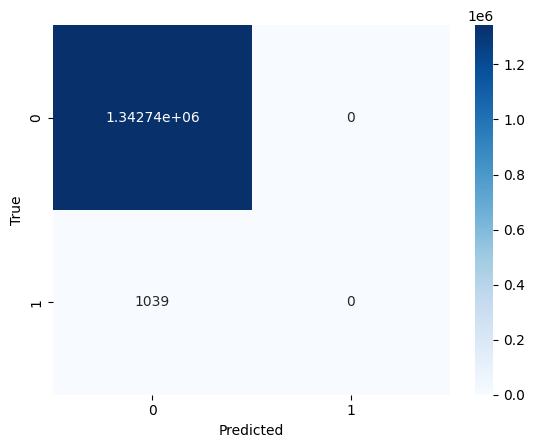

In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import time
from tensorflow.keras.models import load_model

X = pdf[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len']]
print(X)
y = pdf['is_malicious']
print(y)

# Load the saved model
loaded_model = load_model('DL_model.h5')

# Use the loaded model for prediction
y_pred = np.round(model.predict(X)).flatten()


print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


# Visualize the confusion matrix
cm = confusion_matrix(y, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show plot
plt.show()

In [10]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example sentence with combined words, numbers, and signs
sentence = "My password is pass123word! Can you crack it?"

# Tokenize sentence
tokenized_sentence = tokenizer.encode(sentence, add_special_tokens=True)

# Pad tokenized sequence
max_len = 32  # set max length of the token sequence
padded_sentence = tokenized_sentence[:max_len] + [0] * (max_len - len(tokenized_sentence))

# Create attention mask
attention_mask = [1 if token != 0 else 0 for token in padded_sentence]

# Convert input to PyTorch tensors
input_ids = torch.tensor([padded_sentence])
attention_mask = torch.tensor([attention_mask])

# Pass input through BERT model
with torch.no_grad():
    embeddings = model(input_ids, attention_mask=attention_mask)

# Get the embeddings for the [CLS] token, which represents the entire sequence
sentence_embedding = embeddings[0][:, 0, :].numpy()

# Print the sentence embedding
print(sentence_embedding)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[ 7.54527003e-02 -5.77710569e-02  8.40096921e-02 -1.03602178e-01
  -2.99458355e-02 -3.35547507e-01  5.98652244e-01  5.34171462e-01
  -4.79372330e-02 -9.37449932e-02 -7.70231476e-03 -9.31663513e-02
  -6.43330216e-02  1.01389803e-01  3.22310120e-01 -1.20777525e-01
  -2.81326026e-01  6.46205664e-01 -8.10240060e-02 -9.30094644e-02
  -1.38250574e-01 -2.62598038e-01 -4.31872755e-02 -2.27699667e-01
   1.80851862e-01  6.47026226e-02  1.93445776e-02  1.49176985e-01
  -1.53426453e-01 -4.46234234e-02 -1.10935092e-01 -1.62255138e-01
  -5.26472665e-02 -1.56785205e-01  1.09551512e-01 -1.92580745e-02
  -1.98791578e-01  1.41268820e-01  1.12823941e-01  8.14406723e-02
  -2.96268851e-01 -4.27920558e-02  1.38662696e-01  4.92154919e-02
   1.72491983e-01 -3.29023868e-01 -3.03272605e+00 -1.59632936e-01
  -1.96387947e-01 -4.93057072e-01  2.22629026e-01  2.80740976e-01
  -1.46281242e-01  2.51980983e-02  1.27966061e-01 -1.45949215e-01
  -5.07990122e-01  1.73649743e-01 -1.14148863e-01  4.86942194e-02
   4.94451

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from transformers import BertTokenizer, BertModel
import time
import torch
import cudf


# get the start time
st = time.time()

# # Load the pickle file
# with open('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio_vol_longest_word_avg_longest_word_len_uniq.pkl', 'rb') as f:
#     data = pickle.load(f)

# # Convert the loaded data to pandas dataframe
# pdf = pd.DataFrame(data)

# Convert Pandas DataFrame to cuDF DataFrame
df = cudf.DataFrame.from_pandas(pdf)
print(df)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to calculate sentence embeddings using BERT
def calculate_sentence_embedding(sentence):
    # Tokenize sentence
    tokenized_sentence = tokenizer.encode(sentence, add_special_tokens=True)
    # Pad tokenized sequence
    max_len = 32  # set max length of the token sequence
    padded_sentence = tokenized_sentence[:max_len] + [0] * (max_len - len(tokenized_sentence))
    # Create attention mask
    attention_mask = [1 if token != 0 else 0 for token in padded_sentence]
    # Convert input to PyTorch tensors
    input_ids = torch.tensor([padded_sentence]).cuda()
    attention_mask = torch.tensor([attention_mask]).cuda()

    # Pass input through BERT model
    with torch.no_grad():
        embeddings = model(input_ids, attention_mask=attention_mask)
    # Get the embeddings for the [CLS] token, which represents the entire sequence
    sentence_embedding = embeddings[0][:, 0, :].numpy()
    return sentence_embedding


# Apply the function to the 'qname' column to calculate sentence embeddings
df['embedding_bert'] = df['qname'].apply_rows(calculate_sentence_embedding)


df.cudf.DataFrame.to_pickle('/home/hodefi/projects/DNS_DL/df_plus_bert.pkl')
df.head()

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /project/include/rmm/mr/device/cuda_memory_resource.hpp:70: cudaErrorMemoryAllocation out of memory

In [17]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from transformers import BertTokenizer, BertModel
import time
import torch
import cudf


# get the start time
st = time.time()

# # Load the pickle file
# with open('/home/hodefi/projects/DNS_DL/files_10_entropy_type_ratio_vol_longest_word_avg_longest_word_len_uniq.pkl', 'rb') as f:
#     data = pickle.load(f)

# # Convert the loaded data to pandas dataframe
# pdf = pd.DataFrame(data)

# Convert Pandas DataFrame to cuDF DataFrame
# df = cudf.DataFrame.from_pandas(pdf)
df = pdf

print(df)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to calculate sentence embeddings using BERT
def calculate_sentence_embedding(sentence):
    # Tokenize sentence
    tokenized_sentence = tokenizer.encode(sentence, add_special_tokens=True)
    # Pad tokenized sequence
    max_len = 32  # set max length of the token sequence
    padded_sentence = tokenized_sentence[:max_len] + [0] * (max_len - len(tokenized_sentence))
    # Create attention mask
    attention_mask = [1 if token != 0 else 0 for token in padded_sentence]
    # Convert input to PyTorch tensors
    input_ids = torch.tensor([padded_sentence])
    attention_mask = torch.tensor([attention_mask])

    # Pass input through BERT model
    with torch.no_grad():
        embeddings = model(input_ids, attention_mask=attention_mask)
    # Get the embeddings for the [CLS] token, which represents the entire sequence
    sentence_embedding = embeddings[0][:, 0, :].numpy()
    return sentence_embedding

embedding_bert = {}
# get the unique values of the qname column
unique_qnames = df['qname'].unique()

# iterate over the unique qnames and extract the rows that match each qname
for qname in unique_qnames:
    embedding_bert[qname] = calculate_sentence_embedding(qname)
    
# Apply the function to the 'qname' column to calculate sentence embeddings
df['embedding_bert'] = df['qname'].map(embedding_bert)

df.to_pickle('/home/hodefi/projects/DNS_DL/df_plus_bert.pkl')
df.head()

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


           request_ts    response_ts client_token_dec  \
0       1678371763826  1678371763826            38945   
1       1678371763829  1678371763830             8057   
2       1678371763835  1678371763836            13301   
3       1678371763858  1678371763859             8057   
4       1678371763880  1678371763881            23202   
...               ...            ...              ...   
105403  1678371067329  1678371067329            30950   
105404  1678371067329  1678371067330            40399   
105405  1678371067439  1678371067439             1571   
105406  1678371067454  1678371067454            33293   
105407  1678371067471  1678371067471             1571   

                                      qname  qtype  \
0                  BRWFC017C4A49FC.RAC2V1A.      1   
1              endpoint.ingress.rapid7.com.      1   
2             inputs10.fwh.splunkcloud.com.      1   
3              endpoint.ingress.rapid7.com.      1   
4              inputs3.fwh.splunkcloud.com.  

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AttributeError: 'DataFrame' object has no attribute 'cudf'

In [10]:
# pdf.head()
import numpy as np
import time
import pickle
import pandas as pd

# get the start time
st = time.time()

#  Create an empty dictionary to hold the results
results_distance = {}

# Iterate over each unique value in the qname column
for name in pdf['qname'].unique():
    # Get a subset of the DataFrame for the current name
    subset = pdf[pdf['qname'] == name]

    # Add the count to the results dictionary
    results_distance[name] = np.linalg.norm(np.array(subset['embedding_bert']).flatten())
    
pdf['flat_distance_bert'] = pdf['qname'].map(results_distance)


pdf.to_pickle('/home/hodefi/projects/DNS_DL/df_plus_bert_distance.pkl')

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 1116.8224892616272 seconds


In [16]:
import pycuda.driver as cuda

# perform a device reset to refresh the CUDA memory allocation
cuda.Device(0).reset()



ModuleNotFoundError: No module named 'pycuda'

In [17]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from transformers import BertTokenizer, BertModel
import time
import torch
import cudf


# # get the start time
# st = time.time()

# # Load the pickle file
# with open('/home/hodefi/projects/DNS_DL/df_plus_bert_distance.pkl', 'rb') as f:
#     data = pickle.load(f)

# # Convert the loaded data to pandas dataframe
# pdf = pd.DataFrame(data)

print(pdf['distance_bert'][0])
print(pdf['embedding_bert'])

0    [[4.2632513, 2.6714923, 0.21045354, 2.3637924,...
0    [[2.3306897, 2.8337414, 14.946705, 16.999788, ...
0    [[14.780883, 20.772715, 29.75123, 22.987411, 2...
0    [[14.364226, 49.308064, 86.99803, 205.70961, 0...
0    [[5.756098, 13.805673, 4.473771, 28.528877, 13...
0    [[14.164402, 33.011654, 6.1980515, 22.990105, ...
0    [[11.60495, 33.96898, 1.4653243, 20.43147, 38....
0    [[14.364226, 49.308064, 86.99803, 205.70961, 0...
0    [[14.364226, 49.308064, 86.99803, 205.70961, 0...
0    [[4.456664, 3.5097575, 6.3391633, 26.024445, 1...
Name: distance_bert, dtype: object
0         [[-0.95329183, -0.5973639, 0.04705884, -0.5285...
1         [[-0.085921325, -0.17981398, -0.18402329, -0.3...
2         [[-0.1213246, -0.28278938, -0.05308728, -0.196...
3         [[-0.085921325, -0.17981398, -0.18402329, -0.3...
4         [[-0.11307855, -0.24895689, -0.06001684, -0.23...
                                ...                        
105403    [[-0.14310251, -0.20112263, -0.28804478, -0.2

In [3]:
import pandas as pd

# Load the dataframe from a pickle file
df = pd.read_pickle('/home/hodefi/projects/DNS_DL/df_bert_euc_man.pkl')
df.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id  ... qname_vol  qname_len longest_word  \
0            139              ...        20         24                
1            293              ...     22463         28      ingress   
2            149              ...     13629         29        plunk   
3            293              ...     22463         28      ingress   
4            148              ...     14065         28        plunk   

   avg_longest_word_len  unique_query_ratio  \
0              0.000000            0.050000   
1              0.250000            0.000045   
2              0.172414            0.000073   
3              0.250000            0.000045   
4              0.178571            0.000071   

                                      embedding_bert  \
0  [[-0.95329183, -0.5973639, 0.04705884, -0.5285...   
1  [[-0.085921325, -0.17981398, -0.18402329, -0.3...   
2  [[-0.1213246, -0.28278938, -0.05308728, -0.196...   
3  [[-0.085921325, -0.17981398, -0.18402329, -0.3...   
4  [[-0.11307855, -0.24895689, -0.06001684, -0.23...   

                                       distance_bert  \
0  [[4.2632513, 2.6714923, 0.21045354, 2.3637924,...   
1  [[12.878979, 26.949669, 27.583168, 48.536884, ...   
2  [[14.164402, 33.011654, 6.1980515, 22.990105, ...   
3  [[12.878979, 26.949669, 27.583168, 48.536884, ...   
4  [[13.410713, 29.52266, 7.1171165, 27.78152, 30...   

                                  flat_distance_bert  manhattan_distance  \
0  [[4.2632513, 2.6714923, 0.21045354, 2.3637924,...         1410.168457   
1  [[12.878979, 26.949669, 27.583168, 48.536884, ...        38914.343750   
2  [[14.164402, 33.011654, 6.1980515, 22.990105, ...        30884.507812   
3  [[12.878979, 26.949669, 27.583168, 48.536884, ...        38914.343750   
4  [[13.410713, 29.52266, 7.1171165, 27.78152, 30...        30280.804688   

   euclidean_distance  
0           70.737526  
1         2258.473145  
2         1718.219238  
3         2258.473145  
4         1732.987549  

[5 rows x 25 columns]

In [3]:
# Manhattan Distance Calculation:

import numpy as np
import pandas as pd

def calculate_distance_from_beginning(df):
    distances = []
#     i = 0
    for index, row in df.iterrows():
#         i += 1
#         if i == 5:
#             break
        dd_array = row['distance_bert']
        distance = np.sum(np.abs(dd_array))
        distances.append(distance)
    return distances

df['manhattan_distance'] = calculate_distance_from_beginning(df)


In [5]:
# Euclidean Distance Calculation

import numpy as np
import pandas as pd


def calculate_distance_from_beginning(df):
    distances = []
#     i = 0
    for index, row in df.iterrows():
#         i += 1
#         if i == 5:
#             break
        dd_array = row['distance_bert']
        distance = np.sqrt(np.sum(np.square(dd_array)))
        distances.append(distance)
    return distances

df['euclidean_distance'] = calculate_distance_from_beginning(df)

# print(calculate_distance_from_beginning(df))

In [6]:
df.to_pickle('/home/hodefi/projects/DNS_DL/df_bert_euc_man.pkl')


In [7]:
import pandas as pd

# Calculate the average of 'manhattan_distance' for each 'list_id'
averages_manhattan_distance = df.groupby('list_id')['manhattan_distance'].mean()
averages_euclidean_distance = df.groupby('list_id')['euclidean_distance'].mean()

print(averages_manhattan_distance)
print()
print()
print(averages_euclidean_distance)



list_id
                                61611.605469
CNC                               362.921143
MALWARE                          1706.584106
PARTIALLY_MALICIOUS_MALWARE      5300.242188
PARTIALLY_MALICIOUS_PHISHING     3786.621338
PHISHING                          392.920959
Name: manhattan_distance, dtype: float32


list_id
                                3520.724365
CNC                               19.277433
MALWARE                           93.255264
PARTIALLY_MALICIOUS_MALWARE      279.223236
PARTIALLY_MALICIOUS_PHISHING     201.266174
PHISHING                          21.634516
Name: euclidean_distance, dtype: float32


[[268553      0      1      0      0      0]
 [     1      0      0      0      0      0]
 [     8      0      9      0      0      0]
 [     0      0      0    145      0      0]
 [     0      0      0      0     38      0]
 [     0      0      0      0      0      1]]


/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

                              precision    recall  f1-score   support

                                   1.00      1.00      1.00    268554
                         CNC       0.00      0.00      0.00         1
                     MALWARE       0.90      0.53      0.67        17
 PARTIALLY_MALICIOUS_MALWARE       1.00      1.00      1.00       145
PARTIALLY_MALICIOUS_PHISHING       1.00      1.00      1.00        38
                    PHISHING       1.00      1.00      1.00         1

                    accuracy                           1.00    268756
                   macro avg       0.82      0.75      0.78    268756
                weighted avg       1.00      1.00      1.00    268756



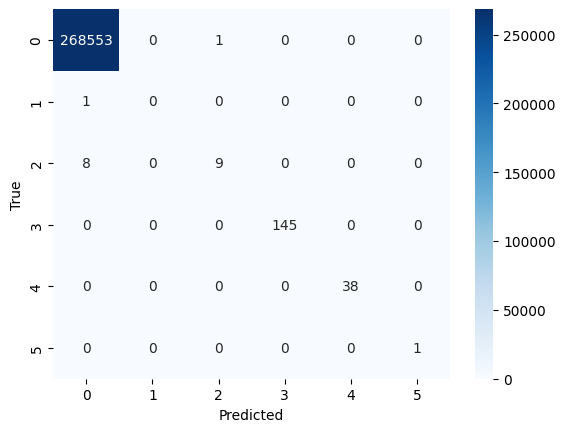

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import IsolationForest
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load your dataset into a Pandas DataFrame
# df = pdf

# Define your feature columns and target column
# X = df[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len','euclidean_distance','manhattan_distance']]
# X = df[['euclidean_distance','manhattan_distance']]
X = df[['euclidean_distance']]
# X = df[['manhattan_distance']]

# y = df['is_malicious']
y = df['list_id']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# filename = '/home/hodefi/projects/DNS_DL/model_RandomForestClassifier_bert_man_euc.sav'
# with open(filename, 'wb') as file:
#     pickle.dump(rf_model, file)
    

# assume y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()

In [24]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load your data
# df = pd.read_csv('data.csv')
pdf = df
# Preprocess your data
# pdf['distance_bert'] = df['distance_bert'].astype('float32')
# pdf['distance_bert'] = df['distance_bert'].values
# pdf['distance_bert'] = df['distance_bert'].values.reshape(-1, 1, 768)
# pdf['distance_bert'] = df['distance_bert'].values.reshape(-1, 768, 1)
# pdf['distance_bert'] = df['distance_bert'].values.reshape(-1, 768)
pdf['distance_bert'] = df['distance_bert'].values.reshape(-1)

pdf['entropy'] = df['entropy'].astype('float32')
pdf['type_ratio'] = df['type_ratio'].astype('float32')
pdf['qname_vol'] = df['qname_vol'].astype('float32')
pdf['qname_len'] = df['qname_len'].astype('float32')
pdf['unique_query_ratio'] = df['unique_query_ratio'].astype('float32')
pdf['avg_longest_word_len'] = df['avg_longest_word_len'].astype('float32')

X = pdf[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len',"distance_bert"]]
y = df['is_malicious']

# Split your data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X , y , test_size=0.2)

# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(768,)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
model.fit(X_train, y_train, epochs=10, batch_size=128)

# Evaluate your model
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 768)

In [28]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your data
# df = pd.read_csv('data.csv')

# Preprocess your data
pdf['distance_bert'] = df['distance_bert'].values.reshape(-1)
# pdf['distance_bert'] = df['distance_bert'].values.reshape(-1, 1, 768)
# pdf['distance_bert'] = df['distance_bert'].values.reshape(-1, 768)

X = pdf[['entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len',"distance_bert"]]
y = df['is_malicious']
# Split your data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define your RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(768,)))
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
model.fit(X_train, y_train, epochs=10, batch_size=128)

# Evaluate your model
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 768)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Prepare the Data
X = df[['distance_bert', 'entropy', 'type_ratio', 'qname_vol', 'qname_len', 'unique_query_ratio', 'avg_longest_word_len']]
y = df['is_malicious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocess the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Design and Train the CNN Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(1, X_train_scaled.shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust the output shape based on your problem (binary or multiclass)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_scaled.reshape((-1, 1, X_train_scaled.shape[1], 1)), y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled.reshape((-1, 1, X_test_scaled.shape[1], 1)), y_test))

# Evaluate your model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: setting an array element with a sequence.

In [32]:
print(df)

           request_ts    response_ts client_token_dec  \
0       1678371763826  1678371763826            38945   
1       1678371763829  1678371763830             8057   
2       1678371763835  1678371763836            13301   
3       1678371763858  1678371763859             8057   
4       1678371763880  1678371763881            23202   
...               ...            ...              ...   
105403  1678371067329  1678371067329            30950   
105404  1678371067329  1678371067330            40399   
105405  1678371067439  1678371067439             1571   
105406  1678371067454  1678371067454            33293   
105407  1678371067471  1678371067471             1571   

                                      qname  qtype  \
0                  BRWFC017C4A49FC.RAC2V1A.      1   
1              endpoint.ingress.rapid7.com.      1   
2             inputs10.fwh.splunkcloud.com.      1   
3              endpoint.ingress.rapid7.com.      1   
4              inputs3.fwh.splunkcloud.com.  

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot
plt.scatter(df['is_malicious'],df['euclidean_distance'], c=df['is_malicious'])

# Add labels and title
plt.ylabel('euclidean_distance')
plt.xlabel('is_malicious')
plt.title('Scatter Plot')

# Display the plot
plt.show()


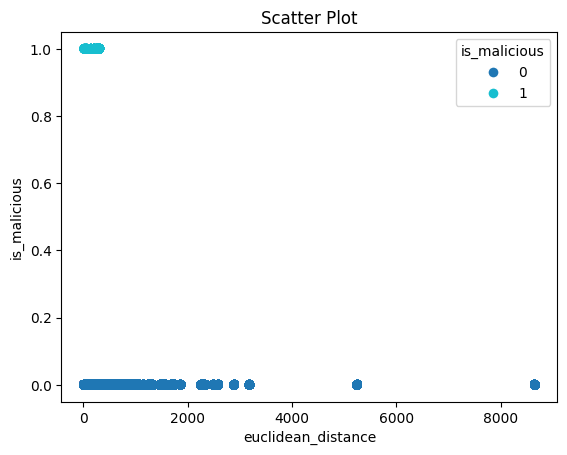

In [37]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a colormap with a unique color for each 'is_malishes' value
unique_labels = df['is_malicious'].unique()
num_labels = len(unique_labels)
color_map = plt.get_cmap('tab10', num_labels)

# Create scatter plot
plt.scatter(df['euclidean_distance'], df['is_malicious'], c=df['is_malicious'], cmap=color_map)

# Add labels and title
plt.xlabel('euclidean_distance')
plt.ylabel('is_malicious')
plt.title('Scatter Plot')

# Create a legend for the color mapping
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(i), markersize=8)
                   for i in range(num_labels)]
plt.legend(legend_elements, unique_labels, title='is_malicious')

# Display the plot
plt.show()

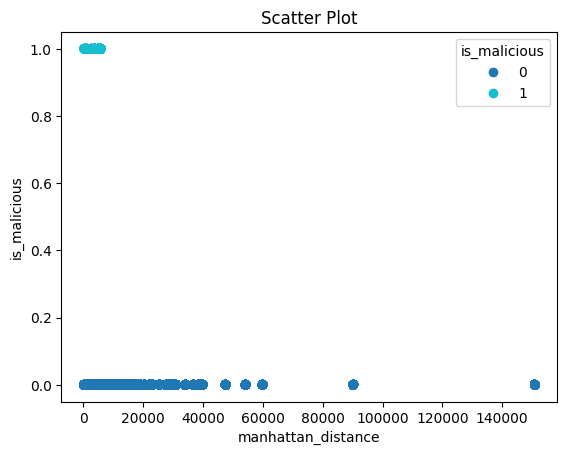

In [38]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a colormap with a unique color for each 'is_malishes' value
unique_labels = df['is_malicious'].unique()
num_labels = len(unique_labels)
color_map = plt.get_cmap('tab10', num_labels)

# Create scatter plot
plt.scatter(df['manhattan_distance'], df['is_malicious'], c=df['is_malicious'], cmap=color_map)

# Add labels and title
plt.xlabel('manhattan_distance')
plt.ylabel('is_malicious')
plt.title('Scatter Plot')

# Create a legend for the color mapping
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(i), markersize=8)
                   for i in range(num_labels)]
plt.legend(legend_elements, unique_labels, title='is_malicious')

# Display the plot
plt.show()

In [39]:
df.head()

request_ts    response_ts client_token_dec  \
0  1678371763826  1678371763826            38945   
1  1678371763829  1678371763830             8057   
2  1678371763835  1678371763836            13301   
3  1678371763858  1678371763859             8057   
4  1678371763880  1678371763881            23202   

                           qname  qtype  \
0       BRWFC017C4A49FC.RAC2V1A.      1   
1   endpoint.ingress.rapid7.com.      1   
2  inputs10.fwh.splunkcloud.com.      1   
3   endpoint.ingress.rapid7.com.      1   
4   inputs3.fwh.splunkcloud.com.      1   

                                              answer  nx_domain  l1_cache_hit  \
0                                                 []          1          True   
1  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
2  [{'class_': 'IN', 'name': 'inputs10.fwh.splunk...          0          True   
3  [{'class_': 'IN', 'name': 'endpoint.ingress.ra...          0          True   
4  [{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...          0          True   

   response_size category_id  ... qname_vol  qname_len longest_word  \
0            139              ...      20.0       24.0                
1            293              ...   22463.0       28.0      ingress   
2            149              ...   13629.0       29.0        plunk   
3            293              ...   22463.0       28.0      ingress   
4            148              ...   14065.0       28.0        plunk   

   avg_longest_word_len  unique_query_ratio  \
0              0.000000            0.050000   
1              0.250000            0.000045   
2              0.172414            0.000073   
3              0.250000            0.000045   
4              0.178571            0.000071   

                                      embedding_bert  \
0  [[-0.95329183, -0.5973639, 0.04705884, -0.5285...   
1  [[-0.085921325, -0.17981398, -0.18402329, -0.3...   
2  [[-0.1213246, -0.28278938, -0.05308728, -0.196...   
3  [[-0.085921325, -0.17981398, -0.18402329, -0.3...   
4  [[-0.11307855, -0.24895689, -0.06001684, -0.23...   

                                       distance_bert  \
0  [[4.2632513, 2.6714923, 0.21045354, 2.3637924,...   
1  [[12.878979, 26.949669, 27.583168, 48.536884, ...   
2  [[14.164402, 33.011654, 6.1980515, 22.990105, ...   
3  [[12.878979, 26.949669, 27.583168, 48.536884, ...   
4  [[13.410713, 29.52266, 7.1171165, 27.78152, 30...   

                                  flat_distance_bert  manhattan_distance  \
0  [[4.2632513, 2.6714923, 0.21045354, 2.3637924,...         1410.168457   
1  [[12.878979, 26.949669, 27.583168, 48.536884, ...        38914.343750   
2  [[14.164402, 33.011654, 6.1980515, 22.990105, ...        30884.507812   
3  [[12.878979, 26.949669, 27.583168, 48.536884, ...        38914.343750   
4  [[13.410713, 29.52266, 7.1171165, 27.78152, 30...        30280.804688   

   euclidean_distance  
0           70.737526  
1         2258.473145  
2         1718.219238  
3         2258.473145  
4         1732.987549  

[5 rows x 25 columns]

In [50]:
import pandas as pd

# Original DataFrame
# df = pd.DataFrame({'bert': ['attr1:value1,attr2:value2', 'attr1:value3,attr3:value4']})

# New DataFrame to store extracted attributes
new_df = pd.DataFrame()
f_bert = {}

# Iterate over 'bert' column and extract attributes
for row in df['distance_bert']:
#     print(row.flatten())
    flat_row = row.flatten()
    f_bert.append(flat_row)
# Print the new DataFrame
print(f_bert)


AttributeError: 'dict' object has no attribute 'append'

In [51]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'df' with a column 'numpy_array_col' containing one-dimensional NumPy arrays
# pdf = pd.DataFrame(df['distance_bert'])

# Create a new DataFrame where the NumPy array defines the columns
new_df = pd.DataFrame(df['distance_bert'].apply(np.ravel).apply(pd.Series))

# Display the new DataFrame
print(new_df)

              0          1          2           3          4           5    \
0        4.263251   2.671492   0.210454    2.363792   0.769174    2.159390   
1       12.878979  26.949669  27.583168   48.536884  17.763638   30.695309   
2       14.164402  33.011654   6.198051   22.990105  39.187977   50.041653   
3       12.878979  26.949669  27.583168   48.536884  17.763638   30.695309   
4       13.410713  29.522659   7.117116   27.781521  30.094427   44.709126   
...           ...        ...        ...         ...        ...         ...   
105403  14.780883  20.772715  29.751230   22.987411  20.887751   32.831226   
105404  14.364226  49.308064  86.998032  205.709610   0.538677  235.383545   
105405  14.364226  49.308064  86.998032  205.709610   0.538677  235.383545   
105406  11.842886  30.291002   7.975849   27.984186  29.188757   47.365147   
105407  14.364226  49.308064  86.998032  205.709610   0.538677  235.383545   

               6           7          8          9    ...      

In [52]:
new_df.to_pickle('/home/hodefi/projects/DNS_DL/new_df_bert.pkl')


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

X = new_df
y = df['is_malicious']

# Split your data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X , y , test_size=0.2)


from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Change num_classes to 1 and activation to 'sigmoid'

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss to 'binary_crossentropy'

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

2023-05-21 22:27:17.080674: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3302467584 exceeds 10% of free system memory.


Epoch 1/10
16798/16798 [==============================] - 94s 5ms/step - loss: 0.0285 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 2/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 3/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 4/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 5/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 6/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 7/10
16798/16798 [==============================] - 80s 5ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have trained your model and obtained predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)  # Convert predicted probabilities to binary classes (0 or 1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

print("Confusion Matrix:")
print(cm)

# Calculate other evaluation metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification Report
target_names = ['Class 0', 'Class 1']
classification_rep = classification_report(y_val, y_pred_classes, target_names=target_names)

print("\nClassification Report:")
print(classification_rep)

8399/8399 [==============================] - 12s 1ms/step
Confusion Matrix:
[[268548      0]
 [   208      0]]

Accuracy: 0.9992260637902037
Precision: nan
Recall: 0.0
F1 Score: nan


/tmp/ipykernel_5475/2049814622.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    268548
     Class 1       0.00      0.00      0.00       208

    accuracy                           1.00    268756
   macro avg       0.50      0.50      0.50    268756
weighted avg       1.00      1.00      1.00    268756



/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import pandas as pd

# Load the dataframe from a pickle file
new_df = pd.read_pickle('/home/hodefi/projects/DNS_DL/new_df_bert.pkl')
new_df['entropy'] = df['entropy']
new_df['type_ratio'] = df['type_ratio']
new_df['qname_vol'] = df['qname_vol']
new_df['qname_len'] = df['qname_len']
new_df['unique_query_ratio'] = df['unique_query_ratio']
new_df['avg_longest_word_len'] = df['avg_longest_word_len']
new_df['euclidean_distance'] = df['euclidean_distance']
new_df['manhattan_distance'] = df['manhattan_distance']
new_df.head()

0          1          2          3          4          5  \
0   4.263251   2.671492   0.210454   2.363792   0.769174   2.159390   
1  12.878979  26.949669  27.583168  48.536884  17.763638  30.695309   
2  14.164402  33.011654   6.198051  22.990105  39.187977  50.041653   
3  12.878979  26.949669  27.583168  48.536884  17.763638  30.695309   
4  13.410713  29.522659   7.117116  27.781521  30.094427  44.709126   

           6          7          8          9  ...        766        767  \
0   0.653104   0.324452   1.441837   1.386224  ...   2.156716   4.593231   
1  81.211639  96.782715  11.723392  36.816040  ...  70.096428  63.822689   
2  51.163136  53.896194   9.397711  14.715212  ...  41.435982  40.460407   
3  81.211639  96.782715  11.723392  36.816040  ...  70.096428  63.822689   
4  54.898067  60.409031   6.608729  27.401833  ...  36.066013  38.559814   

    entropy  type_ratio  qname_vol  qname_len  unique_query_ratio  \
0  3.636842         1.0         20         24            0.050000   
1  3.753434         1.0      22463         28            0.000045   
2  4.004364         1.0      13629         29            0.000073   
3  3.753434         1.0      22463         28            0.000045   
4  3.923252         1.0      14065         28            0.000071   

   avg_longest_word_len  euclidean_distance  manhattan_distance  
0              0.000000           70.737526         1410.168457  
1              0.250000         2258.473145        38914.343750  
2              0.172414         1718.219238        30884.507812  
3              0.250000         2258.473145        38914.343750  
4              0.178571         1732.987549        30280.804688  

[5 rows x 776 columns]

In [5]:
new_df.to_pickle('/home/hodefi/projects/DNS_DL/new_df_bert_with_distance_articals.pkl')

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout


X = new_df
y = df['is_malicious']

# Split your data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X , y , test_size=0.2)


# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Change num_classes to 1 and activation to 'sigmoid'

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss to 'binary_crossentropy'

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


# Save the model to a file
with open('model_dl_all_columns.pkl', 'wb') as file:
    pickle.dump(model, file)

# Assuming you have trained your model and obtained predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)  # Convert predicted probabilities to binary classes (0 or 1)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

print("Confusion Matrix:")
print(cm)

# Calculate other evaluation metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification Report
target_names = ['Class 0', 'Class 1']
classification_rep = classification_report(y_val, y_pred_classes, target_names=target_names)

print("\nClassification Report:")
print(classification_rep)

# assume y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()

2023-05-22 00:45:03.918518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-22 00:45:05.550199: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-22 00:48:16.172639: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6673736576 exceeds 10% of free system memory.


Epoch 1/10
16797/16798 [============================>.] - ETA: 0s - loss: 0.3947 - accuracy: 0.9988

2023-05-22 00:51:19.797013: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1668437248 exceeds 10% of free system memory.


16798/16798 [==============================] - 88s 5ms/step - loss: 0.3947 - accuracy: 0.9988 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 2/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0134 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 3/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0082 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 4/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0079 - accuracy: 0.9992 - val_loss: 0.0090 - val_accuracy: 0.9992
Epoch 5/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 6/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 7/10
16798/16798 [==============================] - 69s 4ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0055 - val

2023-05-22 01:01:52.023521: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1668437248 exceeds 10% of free system memory.


8399/8399 [==============================] - 11s 1ms/step
Confusion Matrix:
[[268537      0]
 [   219      0]]

Accuracy: 0.9991851344714164
Precision: nan
Recall: 0.0
F1 Score: nan


/tmp/ipykernel_20394/3227270569.py:54: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hodefi/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with


Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    268537
     Class 1       0.00      0.00      0.00       219

    accuracy                           1.00    268756
   macro avg       0.50      0.50      0.50    268756
weighted avg       1.00      1.00      1.00    268756



NameError: name 'y_test' is not defined

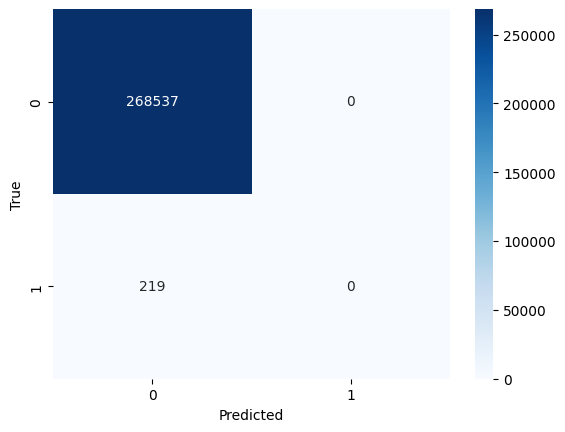

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show plot
plt.show()